In [1]:
# Import necessary libraries for the project
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
# Read in the data stored in .xlsx file into pandas dataframe 
df_term_deposit_marketing = pd.read_csv("./train.csv")

### DATA WRANGLING

In [3]:
# Look at first 5 rows of data
print(df_term_deposit_marketing.head())
print('\n')
# Look at the structure of the data
print(df_term_deposit_marketing.info())

      ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4    

Discussion:

Based on results above, we can see that all the 18 columns are non-null for all the 31647 rows. Since the data was obtained from Kaggle, the data was clean i.e. there were no missing or null values and hence there was not much to do in terms of treating missing values or null values. 

In [4]:
# Look at summary stats of the numerical data
print(df_term_deposit_marketing.describe())

                 ID           age        balance           day      duration  \
count  31647.000000  31647.000000   31647.000000  31647.000000  31647.000000   
mean   22563.972162     40.957247    1363.890258     15.835466    258.113534   
std    13075.936990     10.625134    3028.304293      8.337097    257.118973   
min        2.000000     18.000000   -8019.000000      1.000000      0.000000   
25%    11218.000000     33.000000      73.000000      8.000000    104.000000   
50%    22519.000000     39.000000     450.000000     16.000000    180.000000   
75%    33879.500000     48.000000    1431.000000     21.000000    318.500000   
max    45211.000000     95.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous  
count  31647.000000  31647.000000  31647.000000  
mean       2.765697     39.576042      0.574272  
std        3.113830     99.317592      2.422529  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.00

Discussion:
    
Based on results above, we can see that:

i)age (i.e. age of client) varies from 18 years to 95 years which is reasonable since clients can live upto  95years. 

ii)balance (i.e. outstanding balance) varies from -8019 to 102127 which is reasonable. It is possible for some clients to have negative balance

iii)day (i.e. day of week of contact) varies from 1 to 31 which is reasonable since maximum number of days in a month is 31

iv)duration (i.e. contact duration) varies from 0 to 4918 secs which is reasonable since 4918/3600 secs is 1.36hrs. One to two hours is reasonable timeframe for contact duration.

v)campaign( i.e. number of contacts performed during this campaign to the client) varies from 1 to 63. 63 seems high, so this needs to be investigated further

vi)pdays (i.e. number of days that passed by after the client was last contacted) varies from -1 to 871 days.  871/364 is about 2.39 years which is possible since banks may not be in touch with the clients for few years. 

vii)previous (i.e. number of contacts performed before this campaign) varies from 0 to 275. 275 seems high, so this needs to be investigated further


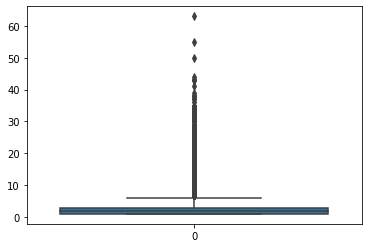

In [5]:
sns.boxplot(data=df_term_deposit_marketing['campaign'])

Based on boxplot above, we can see that 63 seems to lie on the continum of the values. So, there is no need to treat it any differently.

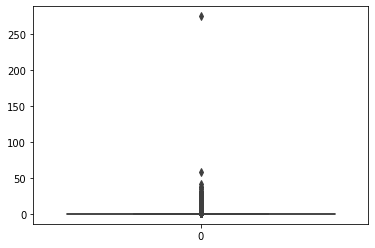

In [6]:
sns.boxplot(data=df_term_deposit_marketing['previous'])

Discussion:

Based on boxplot above, we can see that 275 lies far away from other values. So we can treat it as a potential wrong/incorrect value. The data point/row corresponding to df_term_deposit_marketing[‘previous’] = 275 can potentially be removed. However for this case, I leave it as it is since it is a possible value (i.e if a customer is a longtime customer, it is possible that the customer can be contacted for 275 times prior to this campaign)

Overall, there isn't much data wrangling to do wrt numerical columns.

In [7]:
# Look at value counts of categorial columns to see if there are any categories that are not well defined or
# have really high or really low value counts. 

print('Job:\n',df_term_deposit_marketing['job'].value_counts(),'\n')
print('Marital:\n', df_term_deposit_marketing['marital'].value_counts(),'\n')
print('Education:\n',df_term_deposit_marketing['education'].value_counts(),'\n')
print('Default:\n',df_term_deposit_marketing['default'].value_counts(),'\n')
print('Housing:\n',df_term_deposit_marketing['housing'].value_counts(),'\n')
print('Loan:\n',df_term_deposit_marketing['loan'].value_counts(),'\n')
print('Contact:\n',df_term_deposit_marketing['contact'].value_counts(),'\n')
print('Month:\n',df_term_deposit_marketing['month'].value_counts(),'\n')
print('Poutcome:\n',df_term_deposit_marketing['poutcome'].value_counts(),'\n')
print('Subscribed:\n',df_term_deposit_marketing['subscribed'].value_counts(),'\n')

Job:
 blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64 

Marital:
 married     19095
single       8922
divorced     3630
Name: marital, dtype: int64 

Education:
 secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64 

Default:
 no     31062
yes      585
Name: default, dtype: int64 

Housing:
 yes    17584
no     14063
Name: housing, dtype: int64 

Loan:
 no     26516
yes     5131
Name: loan, dtype: int64 

Contact:
 cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64 

Month:
 may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64 

Poutcome:
 unknown   

Discussion:

Based on results above, we can see that categories for the columns are well defined and value counts for them seem reasonable. So there is not much data wrangling to do wrt categorical columns.